# Simple linear regression

This exercise is useful to see in practice:
- How to lead a simple linear regression model
- Plot graphs of results
- Analyze the residuals, the studentized residuals and the leverage points.

Import all the packages that we need.

In [56]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

Read the data from Auto.csv and remove all rows, that are not complete.

In [ ]:
auto_df = pd.read_csv('Data/Auto.csv', na_values='?')
auto_df = auto_df.dropna()

auto_df.head()

a) Perform a simple linear regression with 'mpg' as the response and 'horsepower' as the predictor. Print the results. Comment on the output.

In [64]:
X = sm.add_constant(auto_df.horsepower)
y = auto_df.mpg
model = sm.OLS(y, X)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                 Mo, 14 Apr 2025   Prob (F-statistic):           7.03e-81
Time:                        18:17:51   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [67]:
Y = 39.9359 + -0.1578 * 98
Y

24.4715

b) Plot the data and the estimate (response and predictor)

Fitted values:  0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
Length: 392, dtype: float64


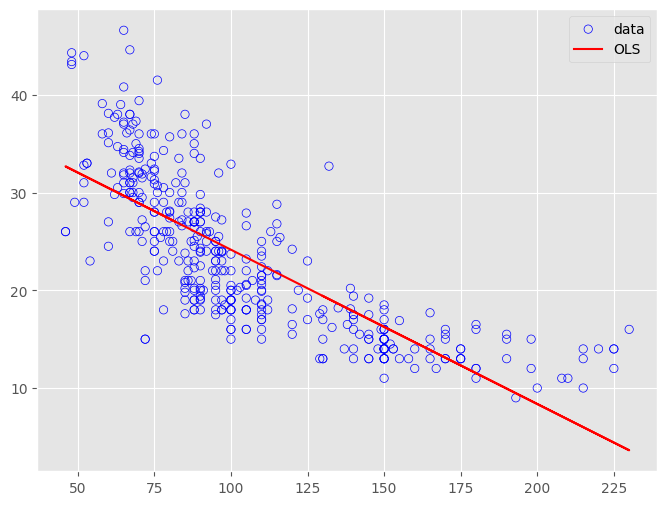

In [80]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X.horsepower.values, y.values, facecolor = 'none', edgecolor = 'b', label='data')
ax.plot(X.horsepower.values, estimate.fittedvalues, 'r', label='OLS')
ax.legend(loc='best')
fitted_values = estimate.fittedvalues

print('Fitted values: ', fitted_values)
# sns.displot(auto_df.mpg, kde=True, bins=20, color='green')

c) Produce diagnostic plots of the least squares regression fit. Comment on any problem you see with the fit.

Text(0, 0.5, 'studentized_residuals')

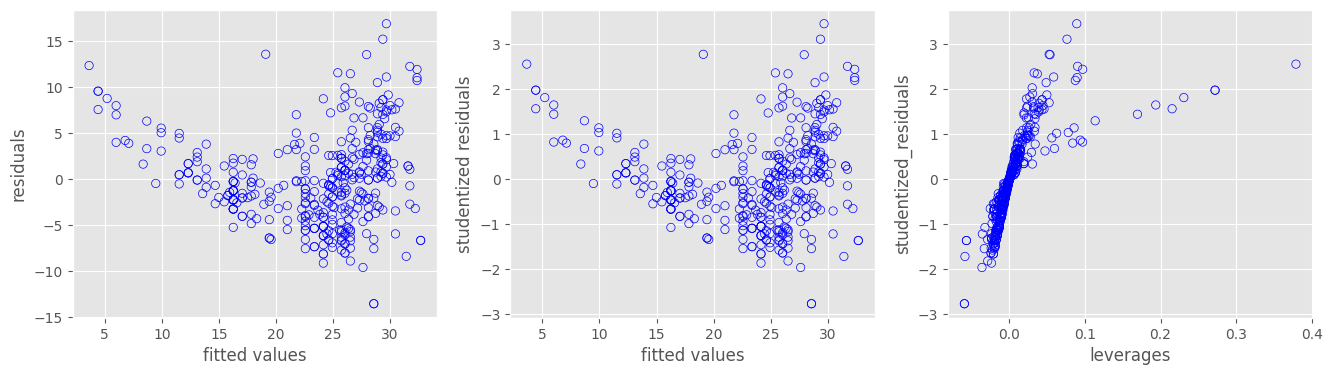

In [81]:
fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
ax1.scatter(fitted_values, residuals, facecolor='none', edgecolor='b')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')

ax2.scatter(fitted_values, studentized_residuals, facecolor='none', edgecolor='b')
ax2.set_xlabel('fitted values')
ax2.set_ylabel('studentized residuals')

ax3.scatter(leverages, studentized_residuals, facecolor='none', edgecolor='b')
ax3.set_xlabel('leverages')
ax3.set_ylabel('studentized_residuals')

Residuals over fitted values shows a heavy U-shaped graph. This indicates a poor fit for a simple linear regression in the higher fitted values.

Studentized residuals over fitted values shows a U-shaped graph and heavy outliers with a >3 studentized residual value (two points). This indicates an underfit.

Studentized residuals over leverages shows many values for leverages over (p+1)/n = (2+1)/392 = 0.005 here. This indicates a poor fit especially for outliers (duh) -> Better to use some quadratic function for fitting.